In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import sklearn
import joblib
from joblib import dump,load
from hyperopt import fmin, Trials, STATUS_OK, hp, tpe
from hyperas.distributions import choice, uniform
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn import preprocessing
from scipy.stats import uniform, randint
import xgboost as xgb
from alepython import ale_plot
import category_encoders as ce
import pickle
import seaborn as sns
import geopy.distance
import itertools

In [72]:
#import data
x_all=pd.read_csv('C:/Users/.../data.csv', 
                  dtype = {"year" : "int64", "RS" : "float64", "lat" : "float64", 
                           "long" : "float64", "SR" : "float64", "PD_doy" : "float64", "N" : "float64",
                           "Y" : "float64", "MG" : "float64", "ppt_pre" : "float64"},
                  na_values="NA", low_memory=False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
x_all1.shape

(86195, 32)

In [73]:
x_all1=x_all[["year", "lat", "long", "soil_type", "irrigation", "PD_doy", "MG", "tillage", "RS", 
               "SR", "previous_crop", "Foliar_application", "drainage", "N", "gmo", "seed_trt_BIO", "seed_trt_I", "seed_trt_F", "seed_trt_N", 
              "ppt_pre", "ppt_season", "ppt_post", "dry_pre_season", "tmax_pre_season", "tmin_post", "tmin_pre_season", 
              "vpdmax_pre_season", "vpdmin_pre", "vpdmin_season", "vpdmin_post", "Y"]].copy()

x_all1.shape

(86195, 31)

<Axes: >

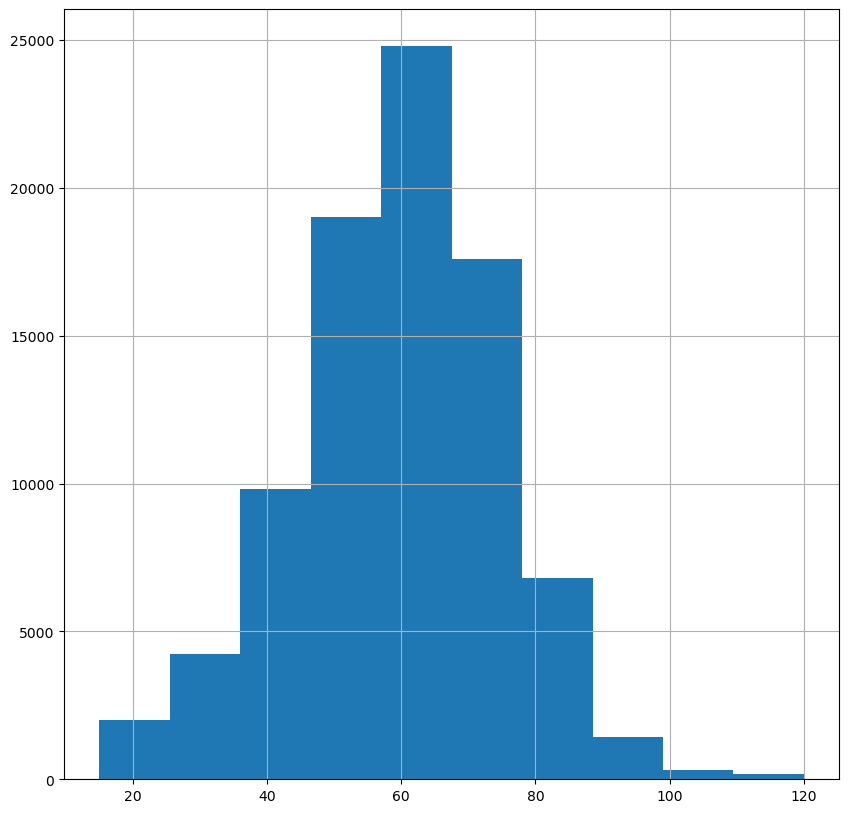

In [74]:
#summary by group
#x_all1.groupby("state").describe()
#x_all1.groupby(["drainage"])["Y"].describe()["mean"]
x_all1['Y'].where(x_all1['Y'] >= 15, 15, inplace=True)
x_all1['Y'].where(x_all1['Y'] <= 120, 120, inplace=True)
x_all1['Y'].hist()

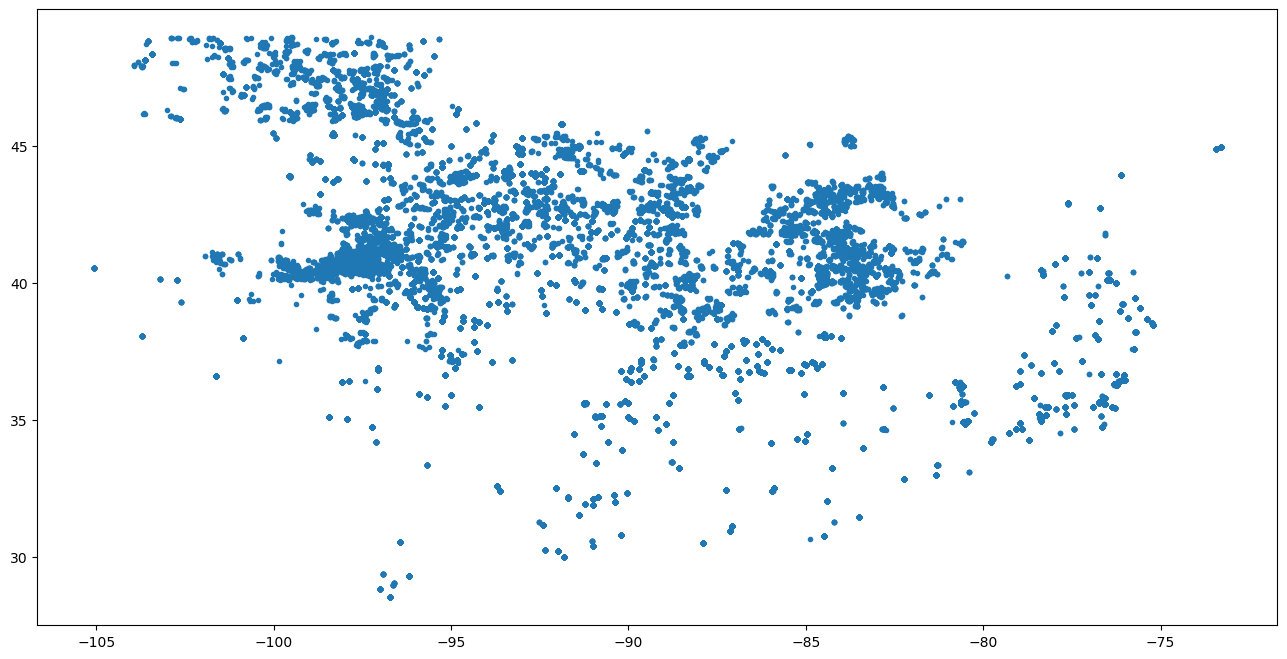

In [75]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x_all1['long'], x_all1['lat'], marker = '.')
plt.show()

In [ ]:
#addition